In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Não usso

In [3]:
pd.set_option('display.max_rows', None)

In [6]:
ca_2004 = pd.read_csv('anos_concatenados/ca_2004.csv')
ca_2004['Ano'] = 2004
ca_2005 = pd.read_csv('anos_concatenados/ca_2005.csv')
ca_2005['Ano'] = 2005
ca_2006 = pd.read_csv('anos_concatenados/ca_2006.csv')
ca_2006['Ano'] = 2006
ca_2007 = pd.read_csv('anos_concatenados/ca_2007.csv')
ca_2007['Ano'] = 2007
ca_2008 = pd.read_csv('anos_concatenados/ca_2008.csv')
ca_2008['Ano'] = 2008
ca_2009 = pd.read_csv('anos_concatenados/ca_2009.csv')
ca_2009['Ano'] = 2009
ca_2010 = pd.read_csv('anos_concatenados/ca_2010.csv')
ca_2010['Ano'] = 2010

In [7]:
ca_2011 = pd.read_csv('anos_concatenados/ca_2011.csv')
ca_2011['Ano'] = 2011
ca_2012 = pd.read_csv('anos_concatenados/ca_2012.csv')
ca_2012['Ano'] = 2012
ca_2013 = pd.read_csv('anos_concatenados/ca_2013.csv')
ca_2013['Ano'] = 2013
ca_2014 = pd.read_csv('anos_concatenados/ca_2014.csv')
ca_2014['Ano'] = 2014
ca_2015 = pd.read_csv('anos_concatenados/ca_2015.csv')
ca_2015['Ano'] = 2015
ca_2016 = pd.read_csv('anos_concatenados/ca_2016.csv')
ca_2016['Ano'] = 2016
ca_2017 = pd.read_csv('anos_concatenados/ca_2017.csv')
ca_2017['Ano'] = 2017
ca_2018 = pd.read_csv('anos_concatenados/ca_2018.csv')
ca_2018['Ano'] = 2018
ca_2019 = pd.read_csv('anos_concatenados/ca_2019.csv')
ca_2019['Ano'] = 2019

In [8]:
ca_2020 = pd.read_csv('anos_concatenados/ca_2020.csv')
ca_2020['Ano'] = 2020
ca_2021 = pd.read_csv('anos_concatenados/ca_2021.csv')
ca_2021['Ano'] = 2021
ca_2022 = pd.read_csv('anos_concatenados/ca_2022.csv')
ca_2022['Ano'] = 2022
ca_2023 = pd.read_csv('anos_concatenados/ca_2023.csv')
ca_2023['Ano'] = 2023

In [9]:
todos_anos = pd.concat([ca_2004, ca_2005, ca_2006, ca_2007, ca_2008, ca_2009, ca_2010, 
                        ca_2011, ca_2012, ca_2013, ca_2014, ca_2015, ca_2016, ca_2017, 
                        ca_2018, ca_2019, ca_2020, ca_2021, ca_2022, ca_2023])

In [10]:
todos_anos.to_csv('todos_anos.csv', index=False)

In [9]:
todos_anos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22645940 entries, 0 to 431575
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Regiao - Sigla     object 
 1   Estado - Sigla     object 
 2   Municipio          object 
 3   Revenda            object 
 4   CNPJ da Revenda    object 
 5   Nome da Rua        object 
 6   Numero Rua         object 
 7   Complemento        object 
 8   Bairro             object 
 9   Cep                object 
 10  Produto            object 
 11  Data da Coleta     object 
 12  Valor de Venda     float64
 13  Valor de Compra    float64
 14  Unidade de Medida  object 
 15  Bandeira           object 
 16  Ano                int64  
dtypes: float64(2), int64(1), object(14)
memory usage: 3.0+ GB


#### USO

In [40]:
todos_anos_pd = pd.read_csv('todos_anos.csv')

In [31]:
todos_anos_pd['Produto'].unique()

array(['GASOLINA', 'ETANOL', 'DIESEL', 'GNV', 'DIESEL S50', 'DIESEL S10',
       'ETANO', 'GASOLINA ADITIVADA'], dtype=object)

In [3]:
condition_gasolina = (todos_anos_pd['Produto'] == 'GASOLINA')
produto_gasolina = todos_anos_pd[condition_gasolina][['Ano','Produto', 'Valor de Venda']]

In [63]:
produto_gasolina.head()

,Ano,Produto,Valor de Venda
0,2004,GASOLINA,1.967
3,2004,GASOLINA,1.850
6,2004,GASOLINA,2.030
9,2004,GASOLINA,1.910
12,2004,GASOLINA,2.039


In [16]:
ma = produto_gasolina.groupby('Ano')['Valor de Venda'].mean()
media_ano_gasolina = pd.DataFrame({'Ano': ma.index, 'Valor de Venda': ma.values})

In [9]:
dolar = pd.read_csv('Dolar ao longo dos anos .csv')

In [10]:
a = ['Ano', 'Média']
dolar_media_ano = dolar[a]

In [50]:
gasolina_dolar = pd.merge(media_ano_gasolina, dolar_media_ano, on='Ano')
gasolina_dolar['Média'] = gasolina_dolar['Média'].str.replace(',', '.').astype(float)
gasolina_dolar['Média'].round(2)
gasolina_dolar.to_csv('gasolina_dolar.csv', index=False)

In [51]:
gd = pd.read_csv('gasolina_dolar.csv')

In [53]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             20 non-null     int64  
 1   Valor de Venda  20 non-null     float64
 2   Média           20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 612.0 bytes


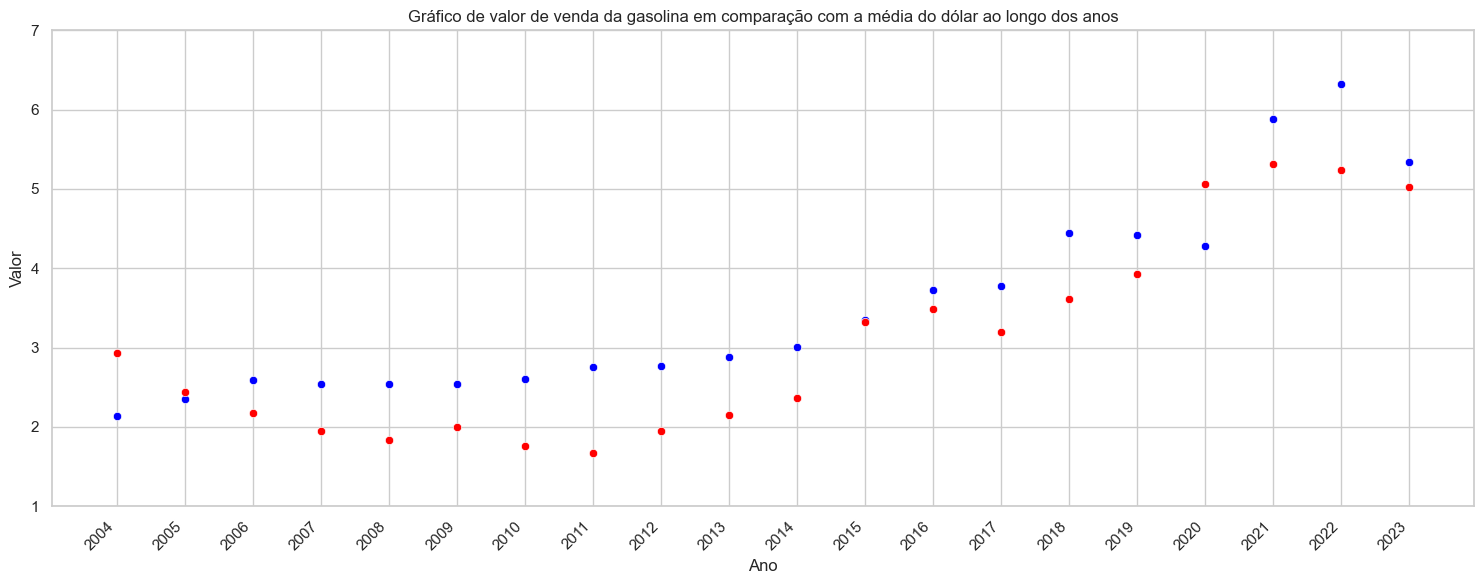

In [61]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Ano', y='Valor de Venda', data=gd, color='blue') # média do valor de venda da gasolina
sns.scatterplot(x='Ano', y='Média', data=gd, color='red') # média do dólar
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Gráfico de valor de venda da gasolina em comparação com a média do dólar ao longo dos anos')
plt.xticks(range(2004, 2024), rotation=45, ha='right')
plt.yticks(range(1,8))
plt.tight_layout()
plt.show()

In [41]:
condition_disel = (todos_anos_pd['Produto'] == 'DIESEL')
produto_disel = todos_anos_pd[condition_disel][['Ano','Produto', 'Valor de Venda']]

In [65]:
md = produto_disel.groupby('Ano')['Valor de Venda'].mean()
media_ano_disel = pd.DataFrame({'Ano': md.index, 'Valor de Venda': md.values})

In [66]:
disel_dolar = pd.merge(media_ano_disel, dolar_media_ano, on='Ano')
disel_dolar['Média'] = disel_dolar['Média'].str.replace(',', '.').astype(float)
disel_dolar['Média'].round(2)
disel_dolar.to_csv('disel_dolar.csv', index=False)

In [67]:
dd = pd.read_csv('disel_dolar.csv')
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             20 non-null     int64  
 1   Valor de Venda  20 non-null     float64
 2   Média           20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 612.0 bytes


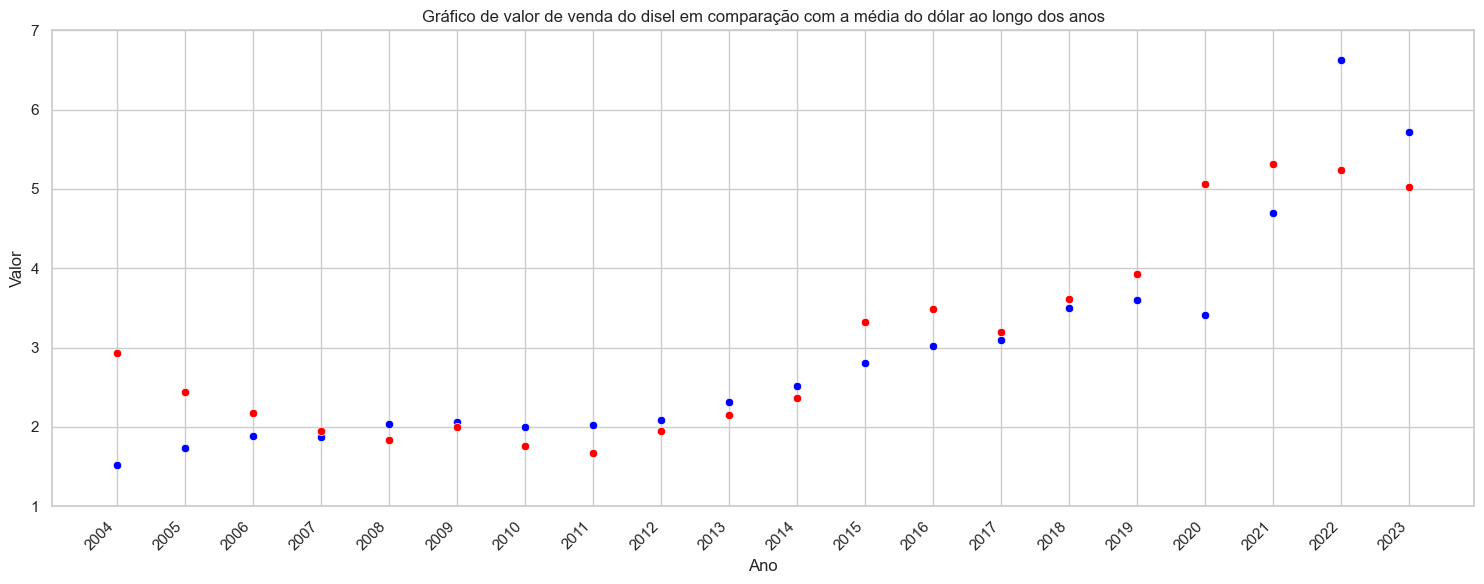

In [68]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Ano', y='Valor de Venda', data=dd, color='blue') # média do valor de venda do disel
sns.scatterplot(x='Ano', y='Média', data=dd, color='red') # média do dólar
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Gráfico de valor de venda do diesel em comparação com a média do dólar ao longo dos anos')
plt.xticks(range(2004, 2024), rotation=45, ha='right')
plt.yticks(range(1,8))
plt.tight_layout()
plt.show()

In [14]:
todos_anos_pd['Bandeira'].unique()

array(['PETROBRAS DISTRIBUIDORA S.A.', 'BRANCA', 'EXXEL', 'LIQUIGÁS',
       'SABBÁ', 'DNP', 'EQUATORIAL', 'CBPI', 'RAIZEN', 'TEMAPE',
       'IPIRANGA', 'EURO COMBUSTÍVEIS', 'COSAN LUBRIFICANTES', 'SATELITE',
       'HORA', 'PETROBAHIA', 'TDC DISTRIBUIDORA', 'PETROSERRA', 'SOLL',
       'SP', 'SETTA DISTRIBUIDORA', 'ALESAT', 'T.A.', 'FRANNEL',
       'ALE COMBUSTÍVEIS', 'ASTER', 'REDE BRASIL', 'UBP PETRÓLEO',
       'LIDERPETRO', 'ZEMA', 'DINAMO', 'UBERLANDIA', 'RIO BRANCO',
       'PETROMIL', 'FORMULA', 'TAURUS', 'ROYAL FIC', 'SIMARELLI', 'JACAR',
       'PETRO AMAZON', 'PDV BRASIL', 'ELLO', 'DISLUB', 'FEDERAL', 'MAX',
       'ELLO-PUMA', 'CIAX', 'SAARA', 'FOX', 'CIAPETRO',
       'AGUIA DISTRIBUIDORA', 'BRASOIL', 'JATOBA', 'IDAZA', 'POTENCIAL',
       'PETROALCOOL', 'UNI', 'PETROPAR DISTRIBUIDORA', 'EQUADOR',
       'LATINA', 'CHARRUA', 'MEGAPETRO', 'AMERICANOIL', 'POLIPETRO',
       'DIBRAPE', 'REJAILE', 'WALENDOWSKY', 'RAIZEN MIME', 'DELTA',
       'SULPETRO', 'GLOBAL DISTRIBUIDOR

In [4]:
bandeira_gasolina = todos_anos_pd[condition_gasolina][['Ano','Produto', 'Bandeira', 'Valor de Venda']]

In [14]:
bg = bandeira_gasolina.groupby(['Bandeira', 'Ano'])['Valor de Venda'].mean().reset_index()

In [15]:
bg.head()

,Bandeira,Ano,Valor de Venda
0,76 OIL,2019,4.699000
1,ABENGOA - SÃO JOÃO,2007,2.580000
2,ACOL,2007,2.557429
3,ACOL,2008,2.571327
4,ACOL,2009,2.560962


C:\Users\mclar\AppData\Local\Temp\ipykernel_10556\4071753347.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\mclar\AppData\Local\Temp\ipykernel_10556\4071753347.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\mclar\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


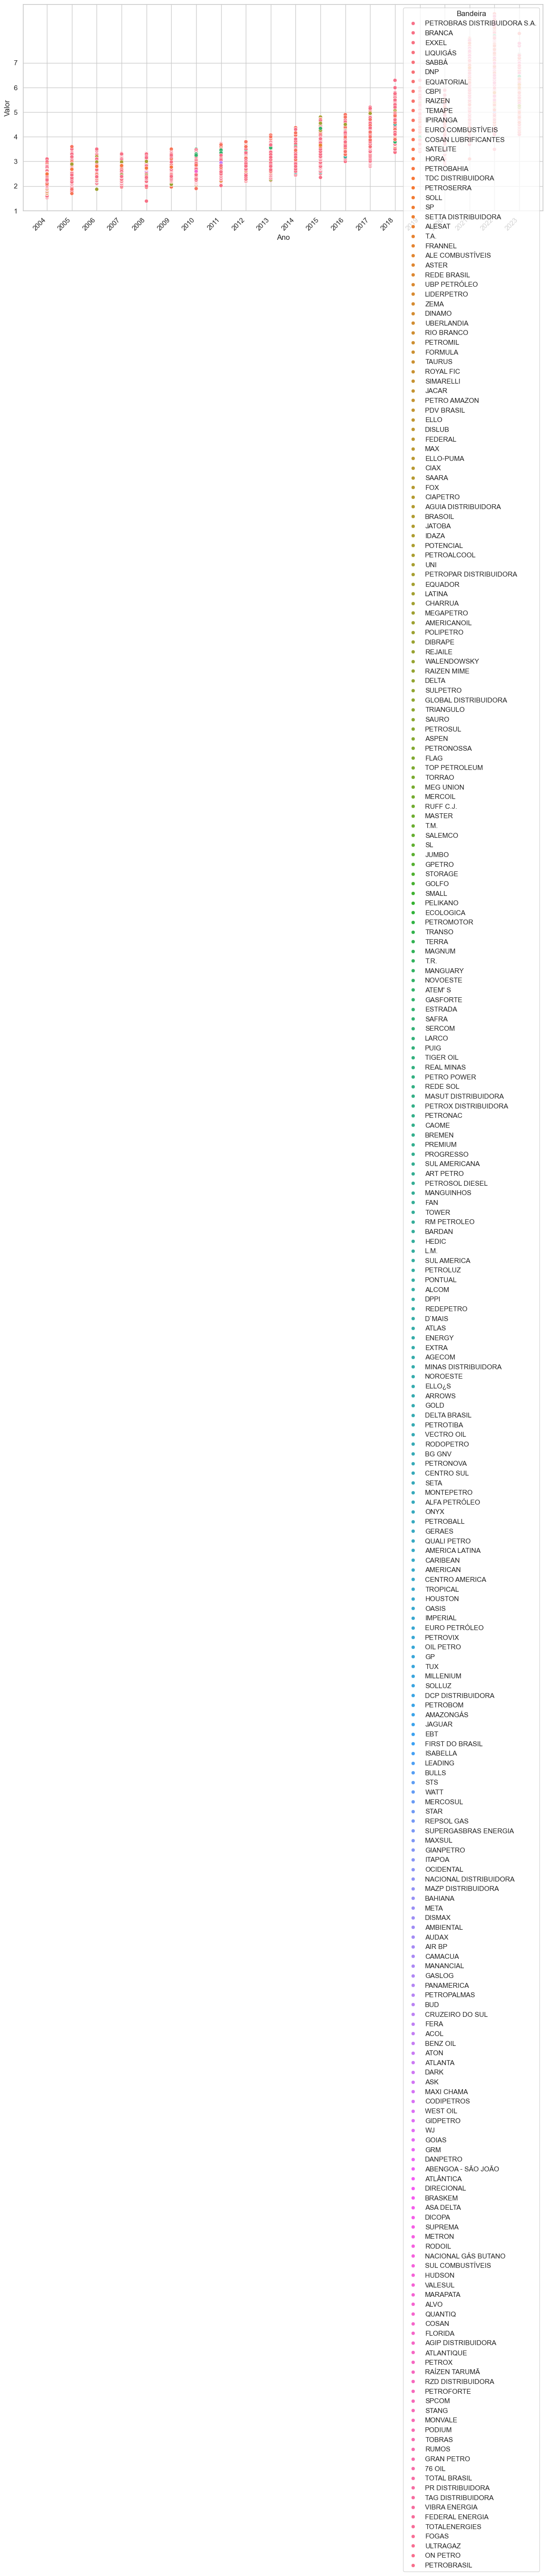

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Ano', y='Valor de Venda', hue='Bandeira', data=bandeira_gasolina, color='blue')
plt.xlabel('Ano')
plt.ylabel('Valor')
# plt.title('Gráfico de valor de venda da gasolina em comparação com a média do dólar ao longo dos anos')
plt.xticks(range(2004, 2024), rotation=45, ha='right')
plt.yticks(range(1,8))
plt.show()

In [48]:
pd.set_option('display.max_rows', None)

In [49]:
contagem_bandeiras= bg['Bandeira'].value_counts()
contagem_bandeiras

Bandeira
REJAILE                         20
BRANCA                          20
ATEM' S                         20
RIO BRANCO                      20
DIBRAPE                         20
RAIZEN MIME                     20
RAIZEN                          20
POTENCIAL                       20
PETROBAHIA                      20
SABBÁ                           20
LARCO                           20
IPIRANGA                        20
IDAZA                           20
CHARRUA                         20
CIAPETRO                        20
EQUADOR                         20
ROYAL FIC                       20
DISLUB                          20
TAURUS                          20
WALENDOWSKY                     20
UNI                             20
TDC DISTRIBUIDORA               20
SP                              20
SIMARELLI                       20
ALESAT                          20
SETTA DISTRIBUIDORA             20
TEMAPE                          20
AMERICANOIL                     20
FAN        

In [5]:
bandeiras_selecionadas = ['REJAILE', 'BRANCA', "ATEM' S", 'RIO BRANCO', 'DIBRAPE', 'RAIZEN MIME', 'RAIZEN', 
                          'POTENCIAL', 'PETROBAHIA', 'SABBÁ', 'LARCO', 'IPIRANGA', 'IDAZA', 'CHARRUA', 'CIAPETRO',
                          'EQUADOR', 'ROYAL FIC', 'DISLUB', 'TAURUS', 'WALENDOWSKY', 'UNI', 'TDC DISTRIBUIDORA', 
                          'SP', 'SIMARELLI', 'ALESAT', 'SETTA DISTRIBUIDORA', 'TEMAPE', 'AMERICANOIL']

In [6]:
dados_filtrados = bandeira_gasolina[bandeira_gasolina['Bandeira'].isin(bandeiras_selecionadas)]

In [22]:
dados_filtrados.to_csv('indices_gasolina.csv', index=False)

In [16]:
bdb = dados_filtrados.groupby(['Ano', 'Bandeira'])['Valor de Venda'].mean().reset_index()

In [37]:
bdb.to_csv('media_bandiera_gasolina.csv', index=False)

In [21]:
dados_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4737007 entries, 3 to 22645939
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Ano             int64  
 1   Produto         object 
 2   Bandeira        object 
 3   Valor de Venda  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 180.7+ MB


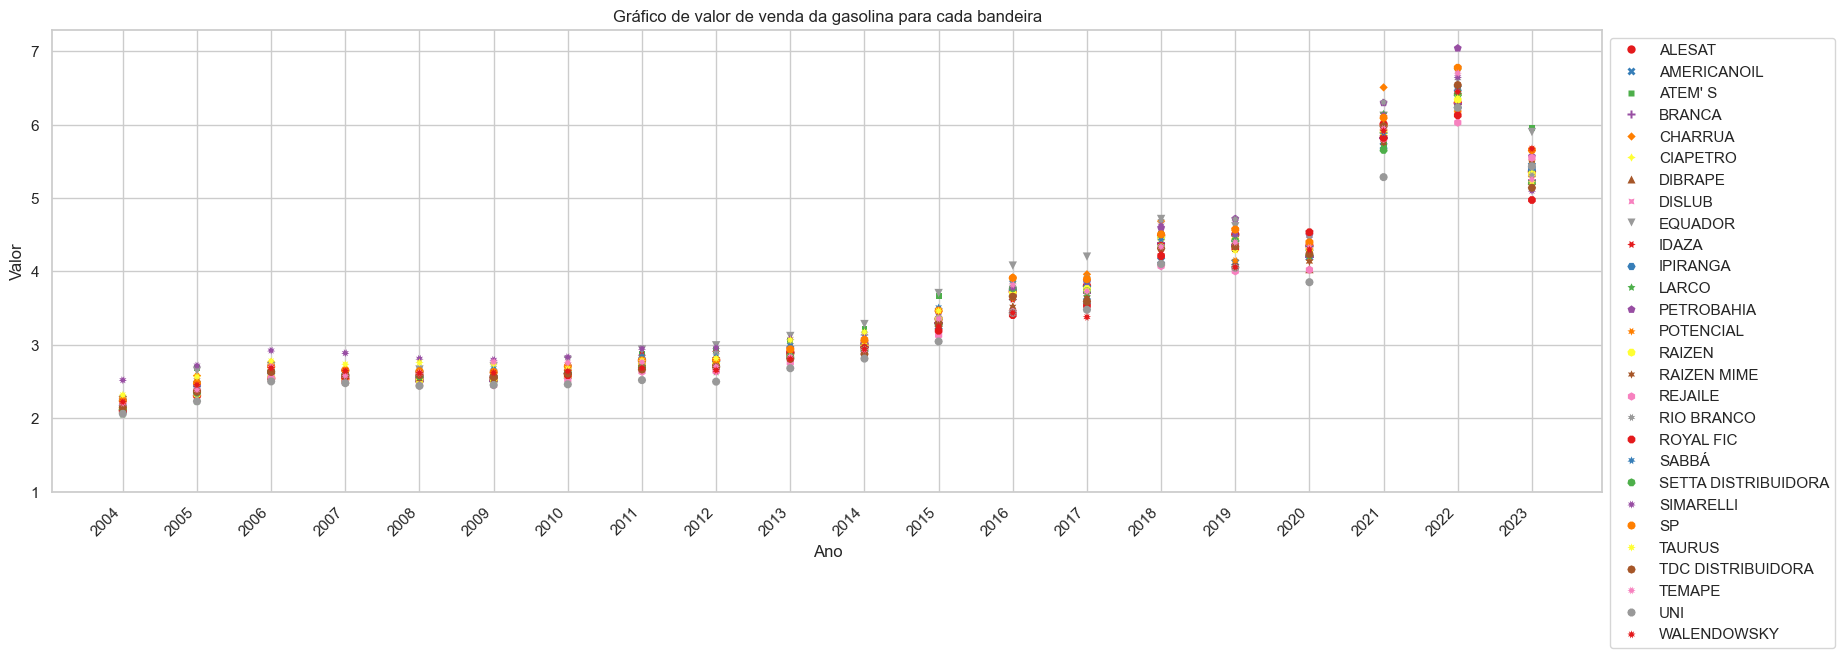

In [59]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Ano', y='Valor de Venda', hue='Bandeira', style='Bandeira', markers=True, data=bdb, palette='Set1', edgecolor='none')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Gráfico de valor de venda da gasolina para cada bandeira')
plt.xticks(range(2004, 2024), rotation=45, ha='right')
plt.yticks(range(1,8))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [42]:
bandeira_diesel = todos_anos_pd[condition_disel][['Ano','Produto', 'Bandeira', 'Valor de Venda']]

In [43]:
bd = bandeira_diesel.groupby(['Bandeira', 'Ano'])['Valor de Venda'].mean().reset_index()

In [44]:
pd.set_option('display.max_rows', None)

In [45]:
contagem_bd = bd['Bandeira'].value_counts()
contagem_bd

Bandeira
CIAPETRO                        20
BRANCA                          20
ATEM' S                         20
DIBRAPE                         20
SP                              20
RAIZEN MIME                     20
PETROBAHIA                      20
DISLUB                          20
TAURUS                          20
POTENCIAL                       20
SABBÁ                           20
RAIZEN                          20
EQUADOR                         20
ALESAT                          20
ROYAL FIC                       20
CHARRUA                         20
LARCO                           20
WALENDOWSKY                     20
IPIRANGA                        20
IDAZA                           20
RIO BRANCO                      20
SIMARELLI                       20
SMALL                           19
PETROX DISTRIBUIDORA            19
SETTA DISTRIBUIDORA             19
REJAILE                         19
PETROSERRA                      19
AMERICANOIL                     19
TDC DISTRIB

In [46]:
bandeiras_selecionadas_diesel = ['CIAPETRO', 'BRANCA', "ATEM' S", 'DIBRAPE', 'SP', 'RAIZEN MIME', 'PETROBAHIA', 
                                'DISLUB', 'TAURUS', 'POTENCIAL', 'SABBÁ', 'RAIZEN', 'EQUADOR', 'ALESAT', 'ROYAL FIC', 
                                'CHARRUA', 'LARCO', 'WALENDOWSKY', 'IPIRANGA', 'IDAZA', 'RIO BRANCO','SIMARELLI']

In [47]:
dados_filtrados_diesel = bandeira_diesel[bandeira_diesel['Bandeira'].isin(bandeiras_selecionadas_diesel)]

In [48]:
dados_filtrados_diesel.to_csv('indices_disel.csv', index=False)

In [49]:
diesel_agrupado = dados_filtrados_diesel.groupby(['Ano', 'Bandeira'])['Valor de Venda'].mean().reset_index()

In [50]:
diesel_agrupado.to_csv('media_bandiera_diesel.csv', index=False)

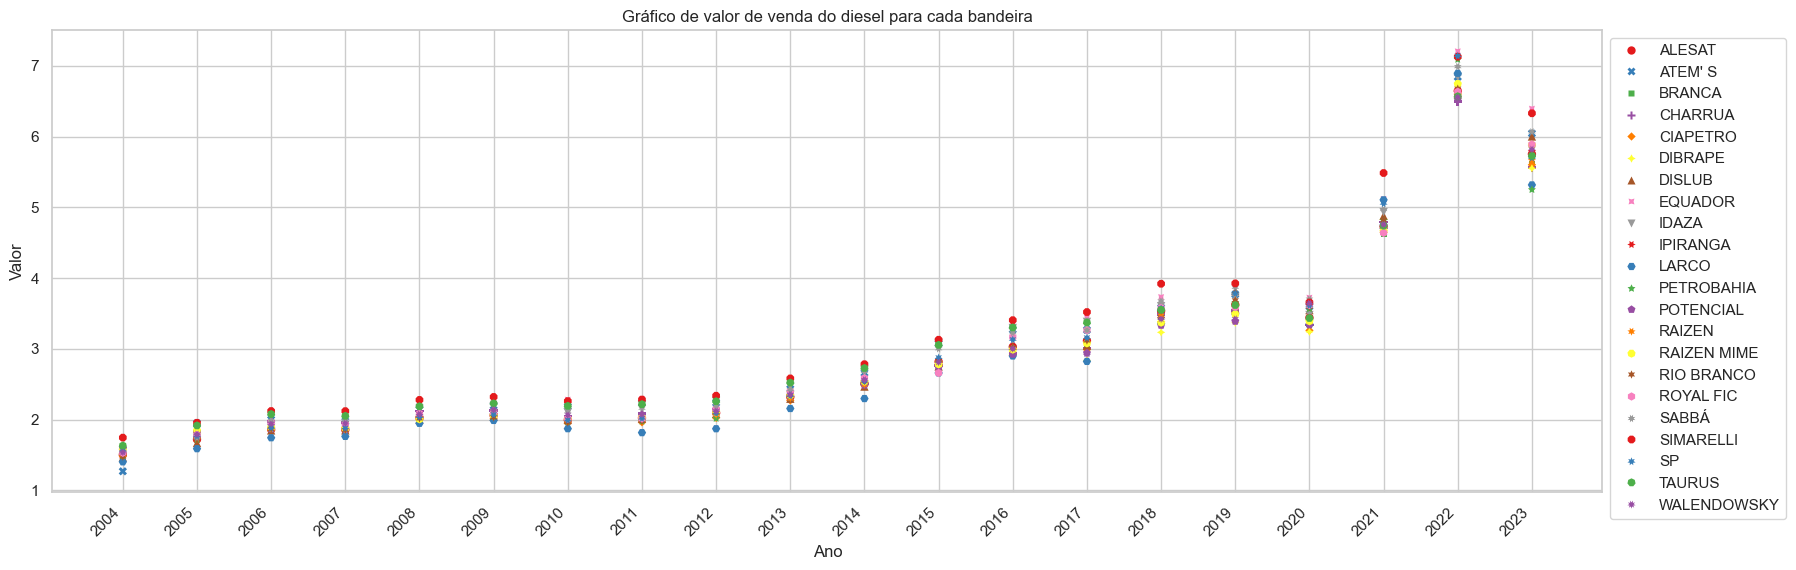

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Ano', y='Valor de Venda', hue='Bandeira', style='Bandeira', markers=True, data=diesel_agrupado, palette='Set1', edgecolor='none')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Gráfico de valor de venda do diesel para cada bandeira')
plt.xticks(range(2004, 2024), rotation=45, ha='right')
plt.yticks(range(1,8))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()